## Top Movie Streaming (Netflix, Amazon, Disney, Hulu)
### Rotten Tomatoes Ratings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.express as px
pyo.init_notebook_mode()
%matplotlib inline

In [2]:
file = './resources/data_1/moviestreams.csv'
df = pd.read_csv(file)
print(df.shape)
df.head()

(16744, 17)


Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1                 United States                  English    136.0  
2                 United States                  English    149.0  
3                 United States                  English    116.0  
4      Italy,Spain,West Germany                  Italian    161.0

In [3]:
list(df)

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

**Drop `'Unnamed: 0'` column**

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             87%   
1   2                      The Matrix  1999  18+   8.7             87%   
2   3          Avengers: Infinity War  2018  13+   8.5             84%   
3   4              Back to the Future  1985   7+   8.5             96%   
4   5  The Good, the Bad and the Ugly  1966  18+   8.8             97%   

   Netflix  Hulu  Prime Video  Disney+  Type                       Directors  \
0        1     0            0        0     0               Christopher Nolan   
1        1     0            0        0     0  Lana Wachowski,Lilly Wachowski   
2        1     0            0        0     0         Anthony Russo,Joe Russo   
3        1     0            0        0     0                 Robert Zemeckis   
4        1     0            1        0     0                    Sergio Leone   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   
4                           Western      Italy,Spain,West Germany   

                  Language  Runtime  
0  English,Japanese,French    148.0  
1                  English    136.0  
2                  English    149.0  
3                  English    116.0  
4                  Italian    161.0

In [5]:
column_names = list(df)
print(column_names)

['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country', 'Language', 'Runtime']


**Drop `'ID'` column**

In [6]:
df.drop('ID', axis = 1, inplace = True)
column_names = list(df)
print(column_names)

['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country', 'Language', 'Runtime']


### Check for missing values

In [7]:
z = df.isnull().sum()
print(z[z > 0])

Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64


### Check data type of various columns

In [8]:
df.dtypes

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

#### Tranform the `Age` and `Rotten Tomatoes` columns to numeric

In [9]:
df.Age.unique()

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

In [10]:
age_map = {'13+': 13, '18+': 18, '7+': 7, 'all': 0, '16+': 16}

df['AgeCopy'] = df.Age.map(age_map)
df.head()

Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0                       Inception  2010  13+   8.8             87%        1   
1                      The Matrix  1999  18+   8.7             87%        1   
2          Avengers: Infinity War  2018  13+   8.5             84%        1   
3              Back to the Future  1985   7+   8.5             96%        1   
4  The Good, the Bad and the Ugly  1966  18+   8.8             97%        1   

   Hulu  Prime Video  Disney+  Type                       Directors  \
0     0            0        0     0               Christopher Nolan   
1     0            0        0     0  Lana Wachowski,Lilly Wachowski   
2     0            0        0     0         Anthony Russo,Joe Russo   
3     0            0        0     0                 Robert Zemeckis   
4     0            1        0     0                    Sergio Leone   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   
4                           Western      Italy,Spain,West Germany   

                  Language  Runtime  AgeCopy  
0  English,Japanese,French    148.0     13.0  
1                  English    136.0     18.0  
2                  English    149.0     13.0  
3                  English    116.0      7.0  
4                  Italian    161.0     18.0

In [11]:
df['Rotten_Tomatoes'] = df['Rotten Tomatoes'].str.replace('%', '')
df.head()

Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0                       Inception  2010  13+   8.8             87%        1   
1                      The Matrix  1999  18+   8.7             87%        1   
2          Avengers: Infinity War  2018  13+   8.5             84%        1   
3              Back to the Future  1985   7+   8.5             96%        1   
4  The Good, the Bad and the Ugly  1966  18+   8.8             97%        1   

   Hulu  Prime Video  Disney+  Type                       Directors  \
0     0            0        0     0               Christopher Nolan   
1     0            0        0     0  Lana Wachowski,Lilly Wachowski   
2     0            0        0     0         Anthony Russo,Joe Russo   
3     0            0        0     0                 Robert Zemeckis   
4     0            1        0     0                    Sergio Leone   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   
4                           Western      Italy,Spain,West Germany   

                  Language  Runtime  AgeCopy Rotten_Tomatoes  
0  English,Japanese,French    148.0     13.0              87  
1                  English    136.0     18.0              87  
2                  English    149.0     13.0              84  
3                  English    116.0      7.0              96  
4                  Italian    161.0     18.0              97

In [12]:
print(df['Rotten_Tomatoes'].dtypes)

object


In [16]:
#df['Rotten_Tomatoes'] = df['Rotten_Tomatoes'].astype(int)

In [14]:
print(df['Rotten_Tomatoes'].dtypes)

object


### Number of movies in each age group

In [17]:
df.Age.value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

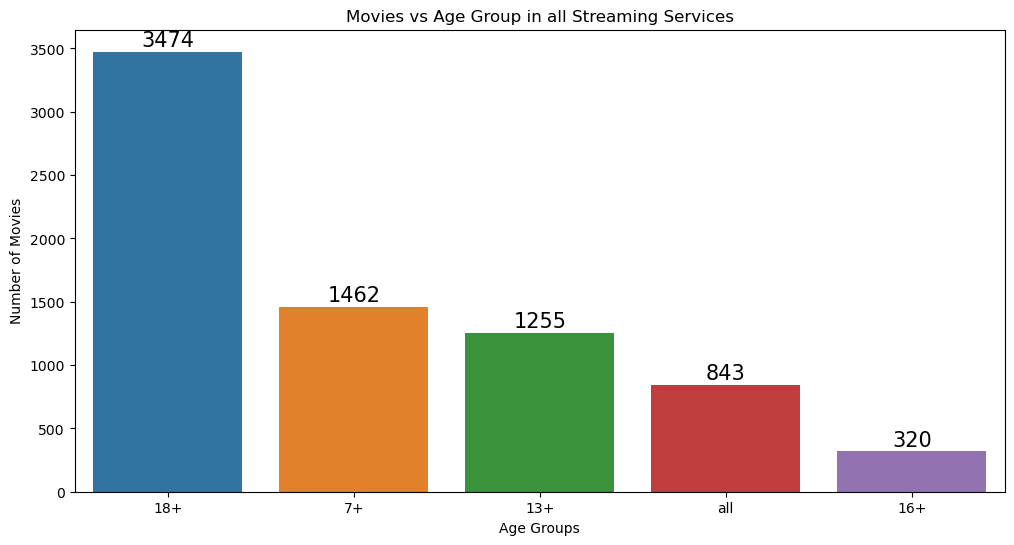

In [40]:
plt.figure(figsize = (12,6))
plots = sns.barplot(x = df.Age.value_counts().index, y = df.Age.value_counts().values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Movies vs Age Group in all Streaming Services')
plt.xlabel('Age Groups')
plt.ylabel('Number of Movies')
plt.show()

### Pie Chart

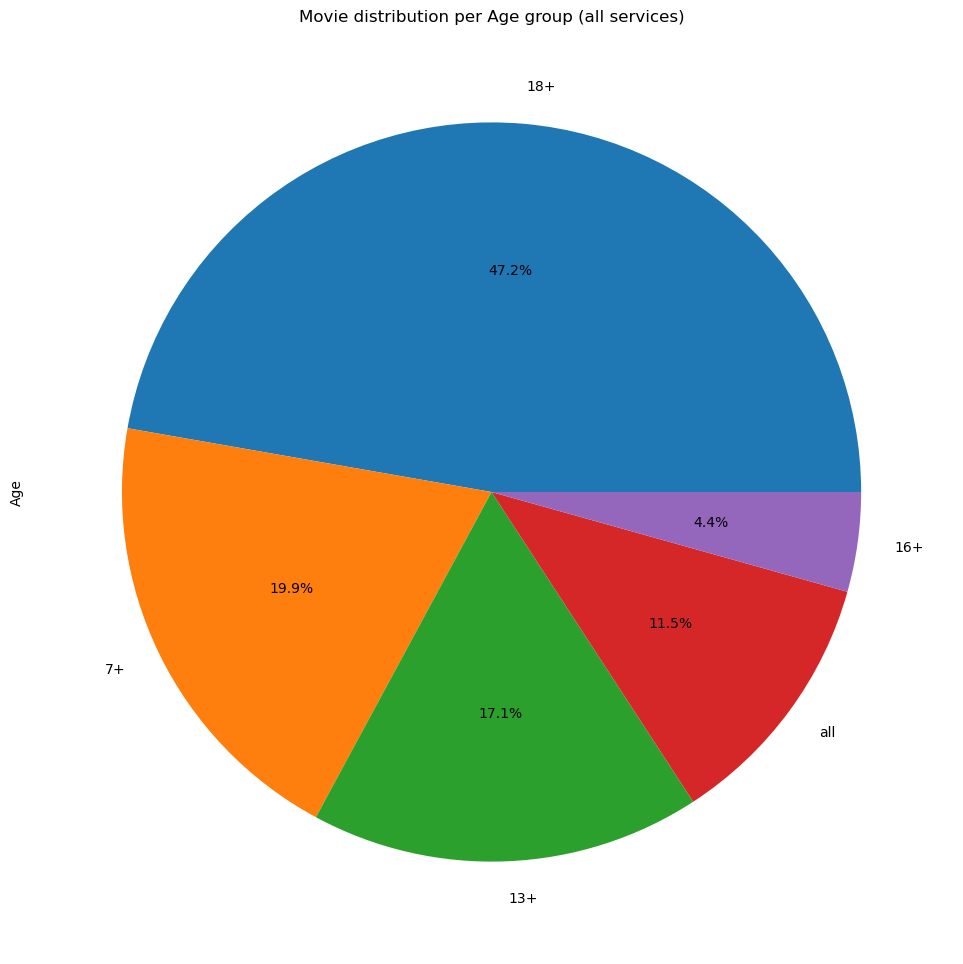

In [41]:
df.Age.value_counts().plot(kind = 'pie', subplots = True, figsize = (12, 12), autopct = '%1.1f%%')
plt.title('Movie distribution per Age group (all services)')
plt.show()

### Number of movies in a particular language

In [19]:
df.Language.value_counts()

English                                                                             10955
Hindi                                                                                 503
English,Spanish                                                                       276
Spanish                                                                               267
English,French                                                                        174
                                                                                    ...  
English,German,Hungarian,Romanian                                                       1
English,Spanish,Chinese,Latin                                                           1
English,Danish,Malay,Dutch,Indonesian,Finnish,Luxembourgish,French Sign Language        1
Dutch,French                                                                            1
English,Algonquin                                                                       1
Name: Lang

### Top 10 languages

In [20]:
top10_languages = df.Language.value_counts().head(10)

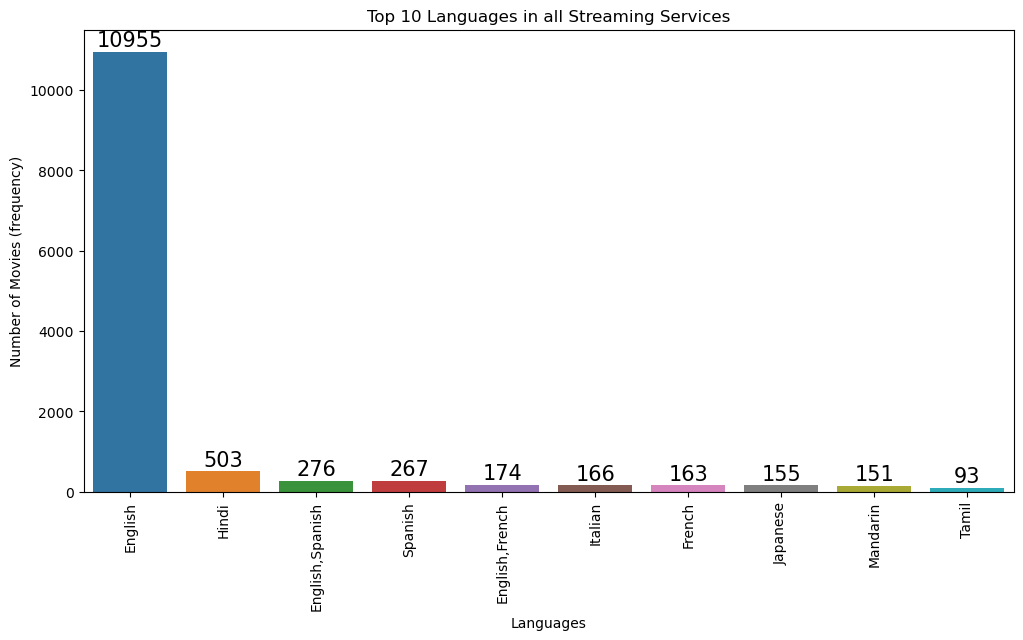

In [42]:
plt.figure(figsize= (12,6))
plots = sns.barplot(x = top10_languages.index, y = top10_languages.values)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Top 10 Languages in all Streaming Services')
plt.xlabel('Languages')
plt.ylabel('Number of Movies (frequency)')
plt.xticks(rotation = 90)
plt.show()

### Pie Chart

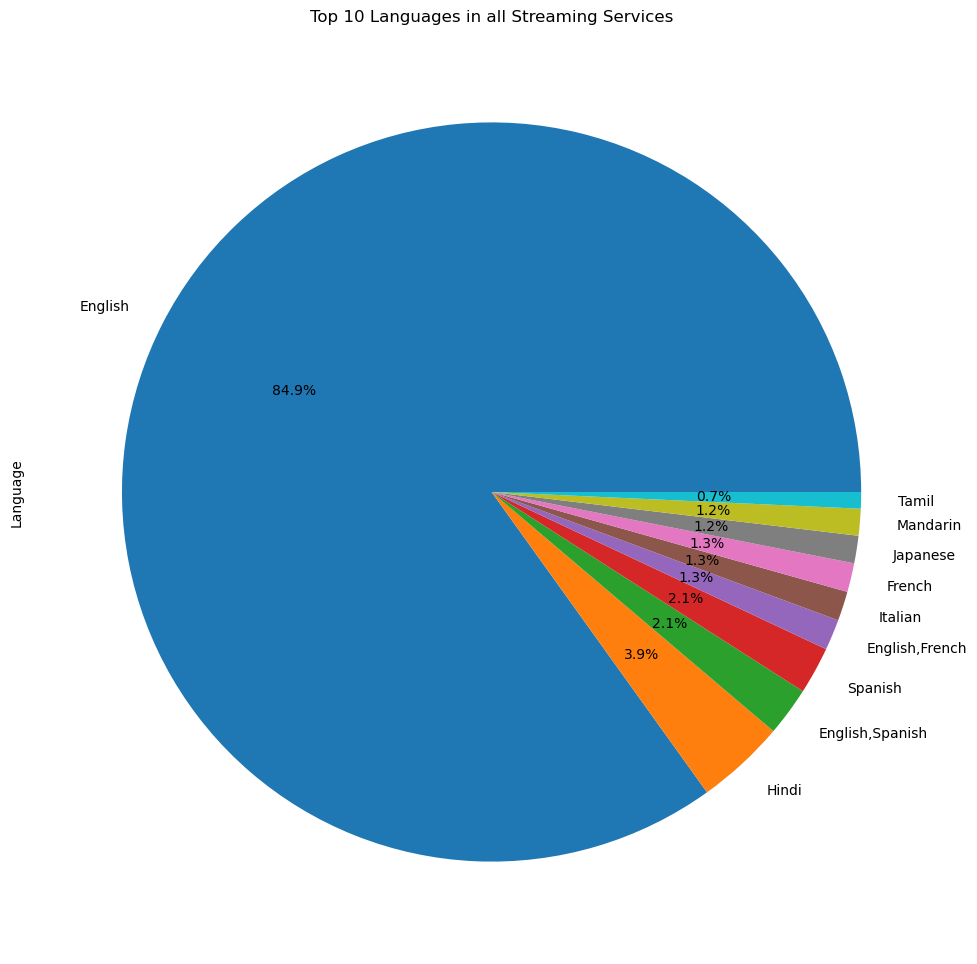

In [43]:
top10_languages.plot(kind = 'pie', subplots = True, figsize = (12, 12), autopct = '%1.1f%%')
plt.title('Top 10 Languages in all Streaming Services')
plt.show()

### Number of movies in a specific age group in Netflix

In [28]:
print(df.Age[df.Netflix == 1].value_counts())

18+    752
13+    383
7+     323
all    130
16+     89
Name: Age, dtype: int64


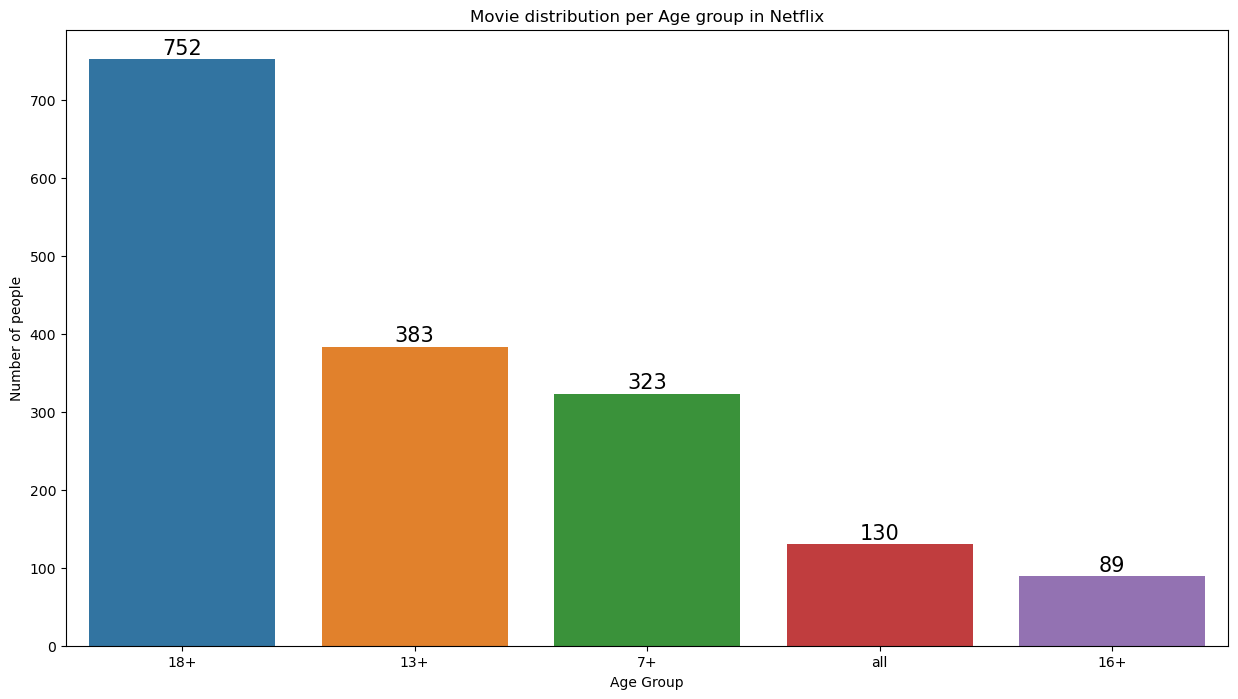

In [29]:
plt.figure(figsize= (15,8))
plots = sns.barplot(x = df.Age[df.Netflix == 1].value_counts().index, y = df.Age[df.Netflix == 1].value_counts().values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Movie distribution per Age group in Netflix')
plt.xlabel('Age Group')
plt.ylabel('Number of people')
plt.show(plots)

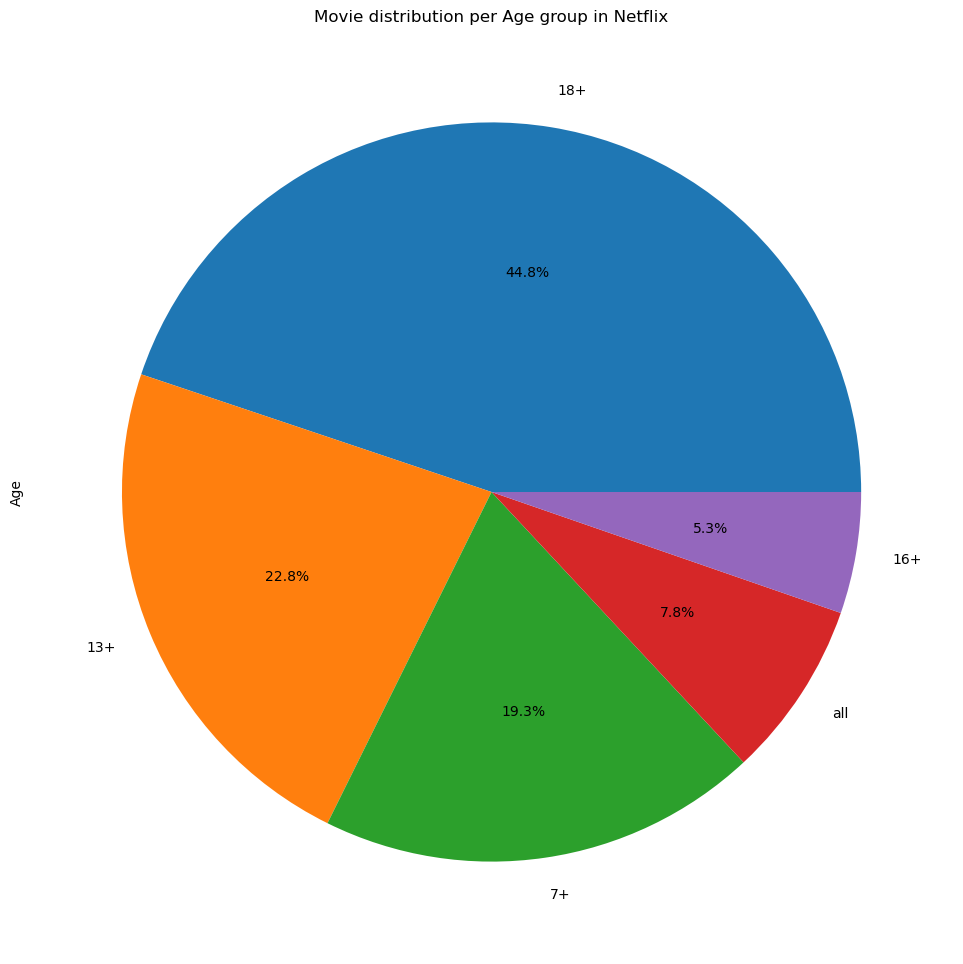

In [30]:
df.Age[df.Netflix == 1].value_counts().plot(kind = 'pie', subplots = True, figsize = (12, 12), autopct = '%1.1f%%')
plt.title('Movie distribution per Age group in Netflix')
plt.show()

### Number of movies in a specific age group in Amazon Prime

In [31]:
print(df.Age[df['Prime Video'] == 1].value_counts())

18+    2612
7+      916
13+     819
all     406
16+     226
Name: Age, dtype: int64


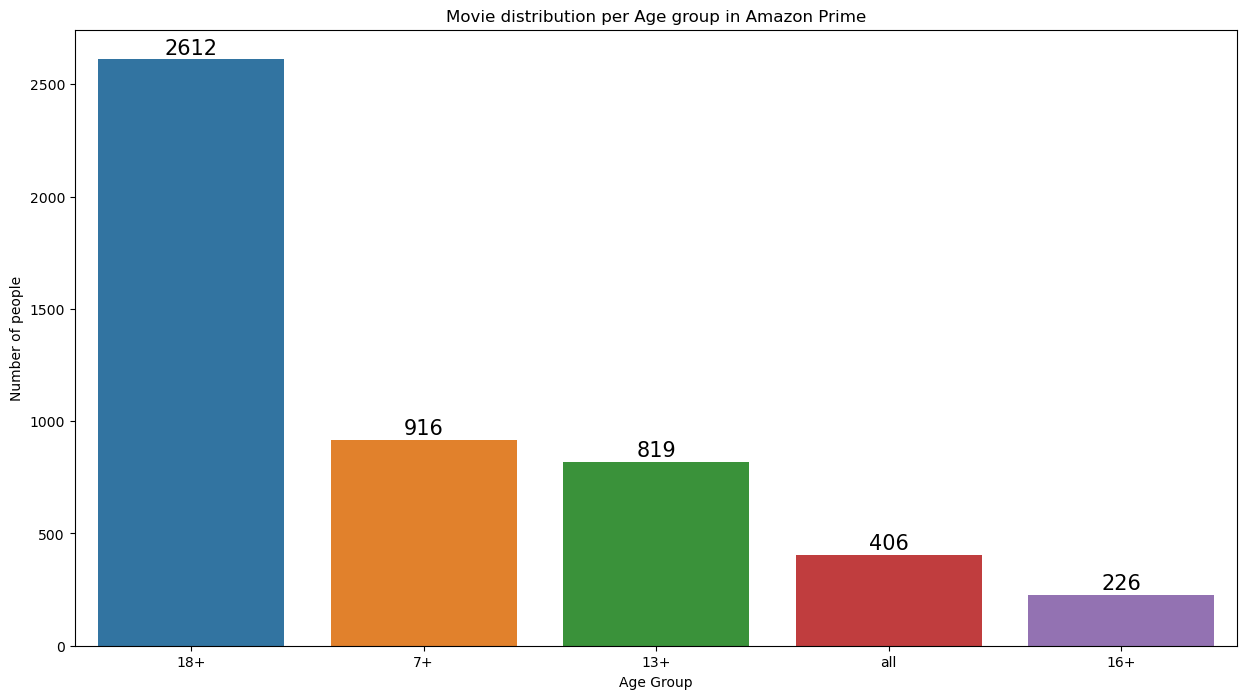

In [32]:
plt.figure(figsize= (15,8))
plots = sns.barplot(x = df.Age[df['Prime Video'] == 1].value_counts().index, y = df.Age[df['Prime Video'] == 1].value_counts().values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Movie distribution per Age group in Amazon Prime')
plt.xlabel('Age Group')
plt.ylabel('Number of people')
plt.show(plots)

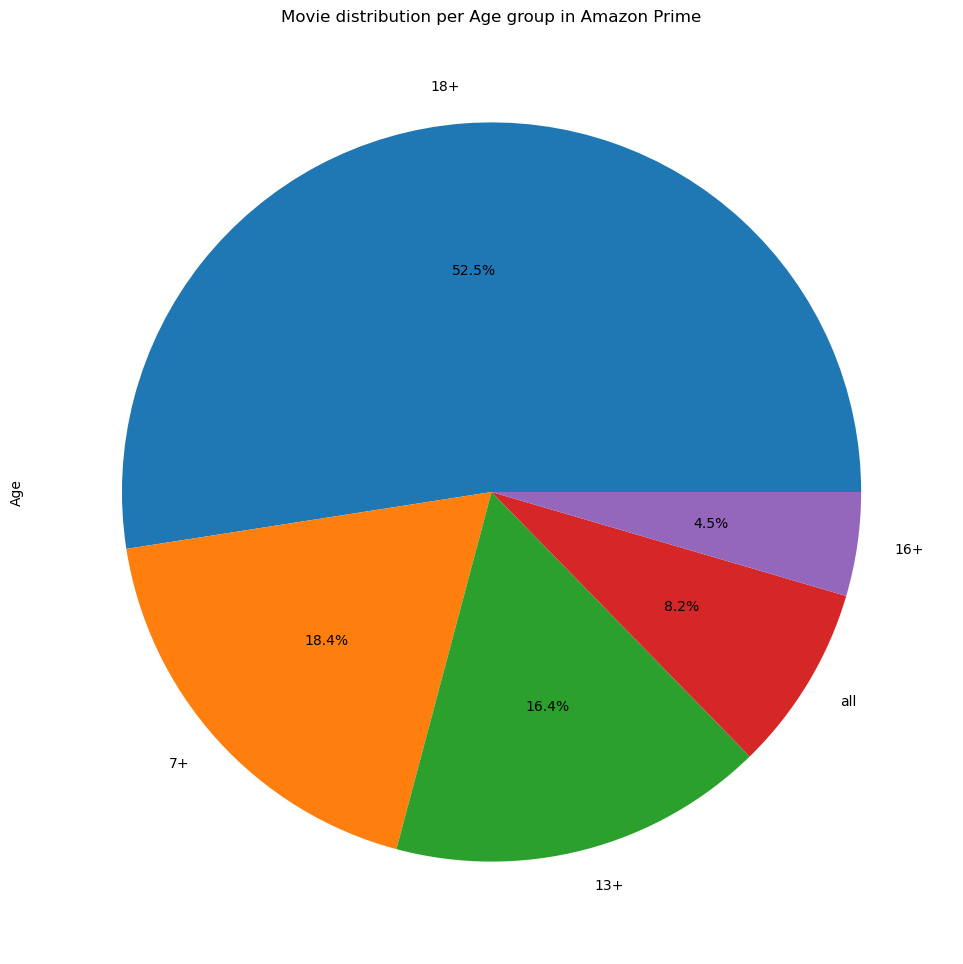

In [33]:
df.Age[df['Prime Video'] == 1].value_counts().plot(kind = 'pie', subplots = True, figsize = (12, 12), autopct = '%1.1f%%')
plt.title('Movie distribution per Age group in Amazon Prime')
plt.show()

### Number of movies in a specific age group in Disney

In [34]:
print(df.Age[df['Disney+'] == 1].value_counts())

all    277
7+     179
13+     40
18+      3
16+      1
Name: Age, dtype: int64


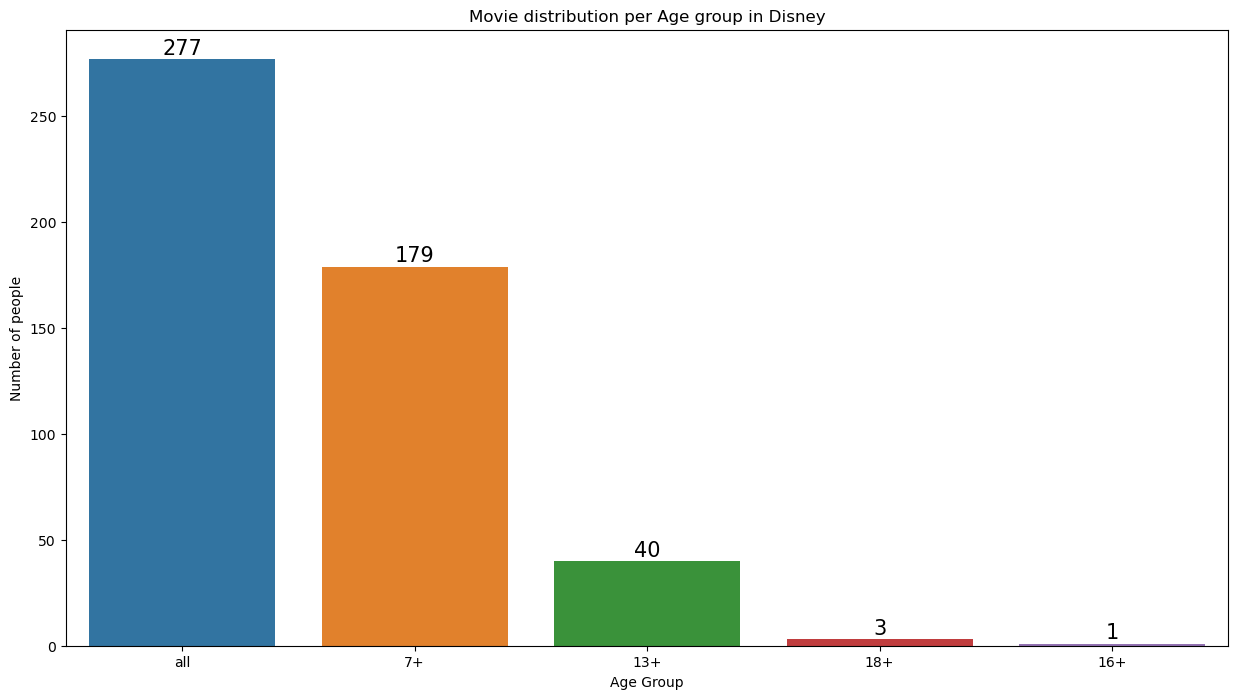

In [35]:
plt.figure(figsize= (15,8))
plots = sns.barplot(x = df.Age[df['Disney+'] == 1].value_counts().index, y = df.Age[df['Disney+'] == 1].value_counts().values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Movie distribution per Age group in Disney')
plt.xlabel('Age Group')
plt.ylabel('Number of people')
plt.show(plots)

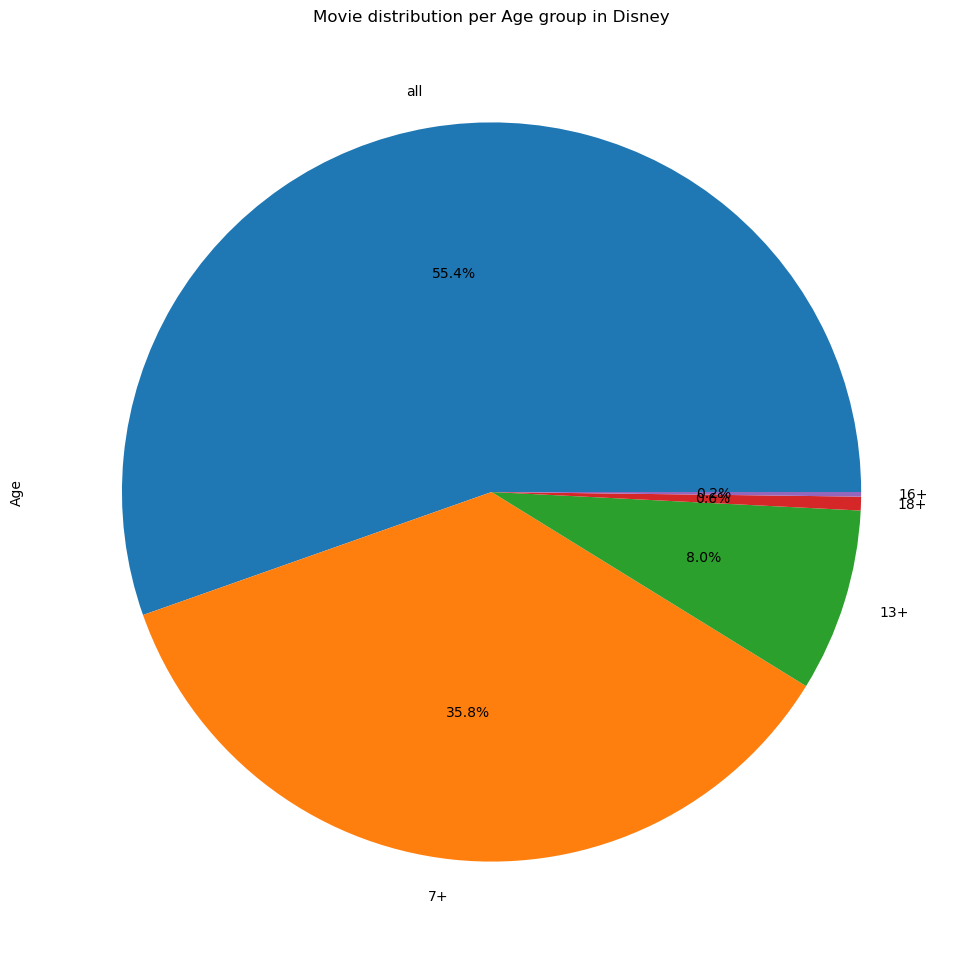

In [36]:
df.Age[df['Disney+'] == 1].value_counts().plot(kind = 'pie', subplots = True, figsize = (12, 12), autopct = '%1.1f%%')
plt.title('Movie distribution per Age group in Disney')
plt.show()

### Number of movies in a specific age group in Hulu

In [37]:
print(df.Age[df['Hulu'] == 1].value_counts())

18+    290
13+    119
7+     109
all     55
16+     17
Name: Age, dtype: int64


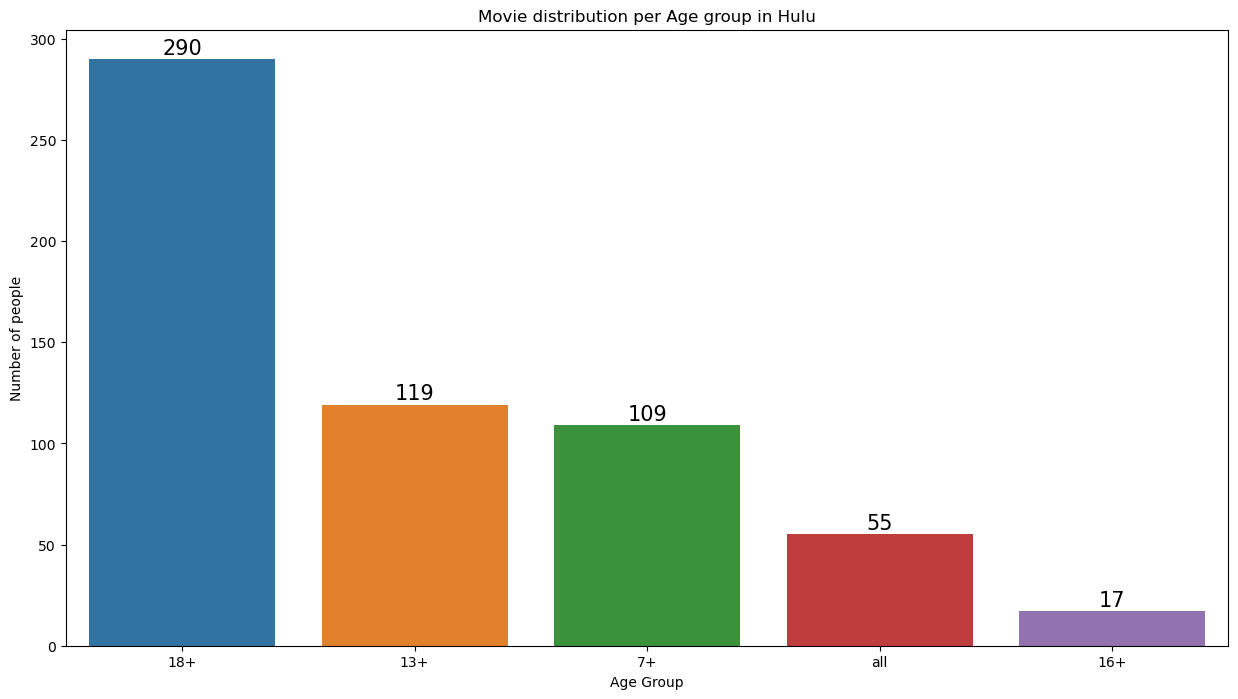

In [38]:
plt.figure(figsize= (15,8))
plots = sns.barplot(x = df.Age[df['Hulu'] == 1].value_counts().index, y = df.Age[df['Hulu'] == 1].value_counts().values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Movie distribution per Age group in Hulu')
plt.xlabel('Age Group')
plt.ylabel('Number of people')
plt.show(plots)

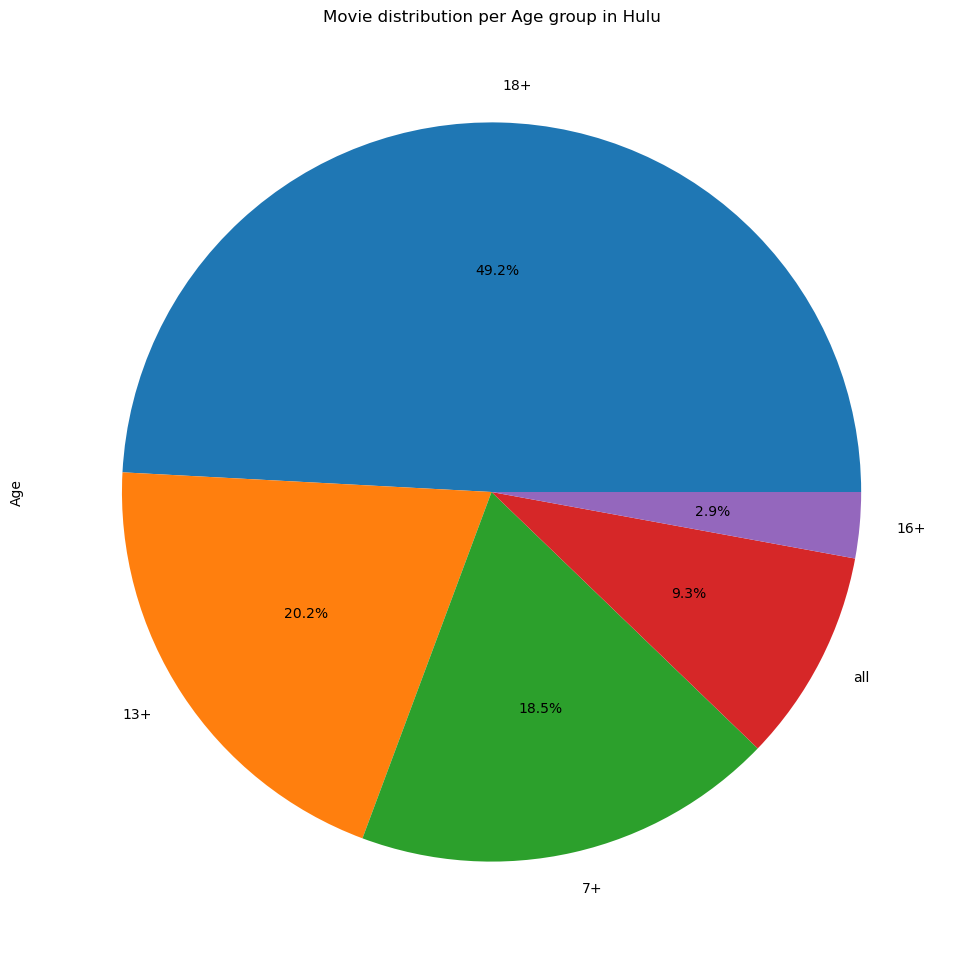

In [39]:
df.Age[df['Hulu'] == 1].value_counts().plot(kind = 'pie', subplots = True, figsize = (12, 12), autopct = '%1.1f%%')
plt.title('Movie distribution per Age group in Hulu')
plt.show()

### Overall Rotten Tomato Ratings
The **Tomatometer score** represents the percentage of professional critic reviews that are **positive** for a given film or television show. A Tomatometer score is calculated for a movie or TV show after it receives **at least five reviews**.

* When **at least 60%** of reviews for a movie or TV show are **positive**, a **red tomato** is displayed to indicate its Fresh status.

* When **less than 60%** of reviews for a movie or TV show are **positive**, a **green splat** is displayed to indicate its Rotten status.

* When there is no Tomatometer® score available, which could be because the Title hasn’t released yet or there are not enough ratings to generate a score, a **neutral tomoto** is displayed.

In [44]:
rot_tomato_ratings = df['Rotten Tomatoes'].value_counts().sort_values()
rot_tomato_ratings

2%        4
3%        4
4%        9
5%       10
7%       10
       ... 
67%     126
83%     131
50%     136
80%     162
100%    407
Name: Rotten Tomatoes, Length: 99, dtype: int64

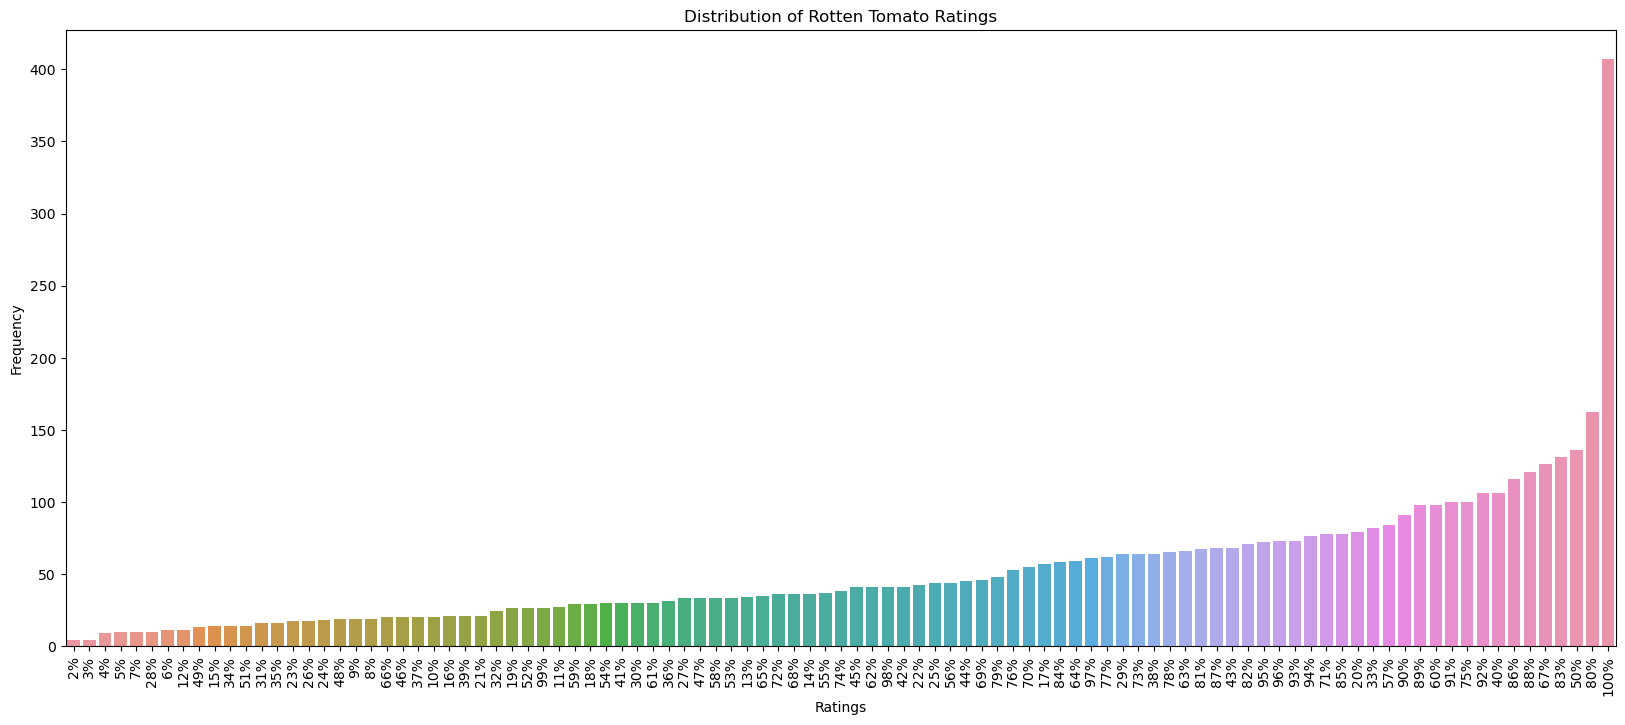

In [45]:
plt.figure(figsize= (20,8))
plots = sns.barplot(x = rot_tomato_ratings.index, y = rot_tomato_ratings.values)
# for bar in plots.patches:
#     plots.annotate(format(bar.get_height(), '.0f'),
#                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
#                    ha = 'center', va = 'center',
#                    size = 15, xytext = (0, 8),
#                    textcoords = 'offset points')
plt.title('Distribution of Rotten Tomato Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show(plots)

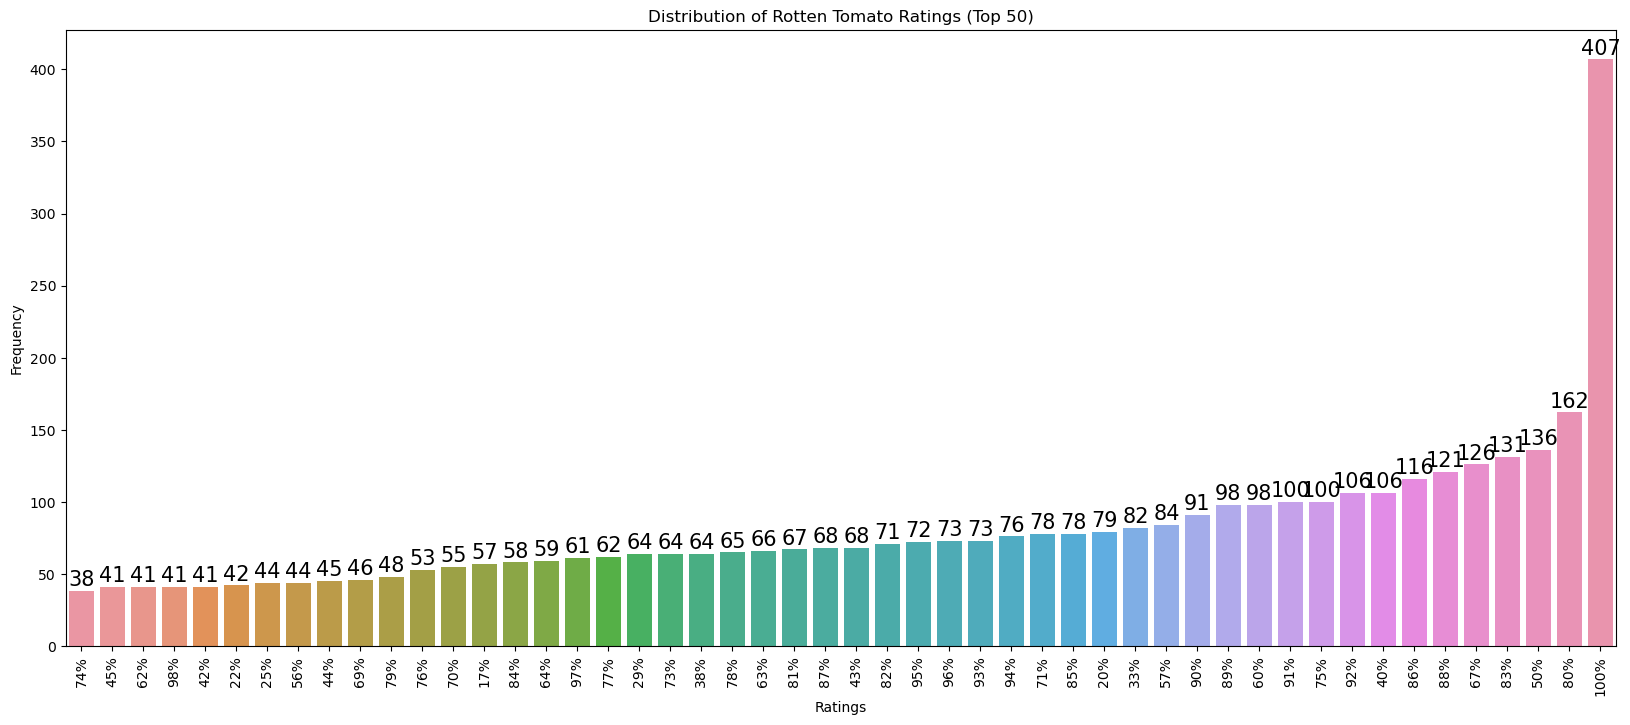

In [53]:
plt.figure(figsize= (20,8))
plots = sns.barplot(x = rot_tomato_ratings.tail(50).index, y = rot_tomato_ratings.tail(50).values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Distribution of Rotten Tomato Ratings (Top 50)')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show(plots)

In [54]:
# fig = px.bar(df, 
#              x = df['Rotten Tomatoes'].value_counts().index, 
#              y = df['Rotten Tomatoes'].value_counts(),
#              title = 'Overall Rotten Tomato Ratings',
#              text = df['Rotten Tomatoes'].value_counts(),
#              height = 600
#              )    
# fig.update_traces(texttemplate = '%{text:.2s}', textposition = 'outside')
# HTML(fig.to_html())

### Rotten Tomato Score For each of the Services
#### Netflix

In [46]:
tomato_ratings_netflix = df.loc[df.Netflix == 1, 'Rotten Tomatoes'].value_counts().sort_values()
tomato_ratings_netflix

3%        1
7%        1
4%        1
8%        2
28%       3
       ... 
83%      33
95%      34
50%      37
80%      47
100%    130
Name: Rotten Tomatoes, Length: 98, dtype: int64

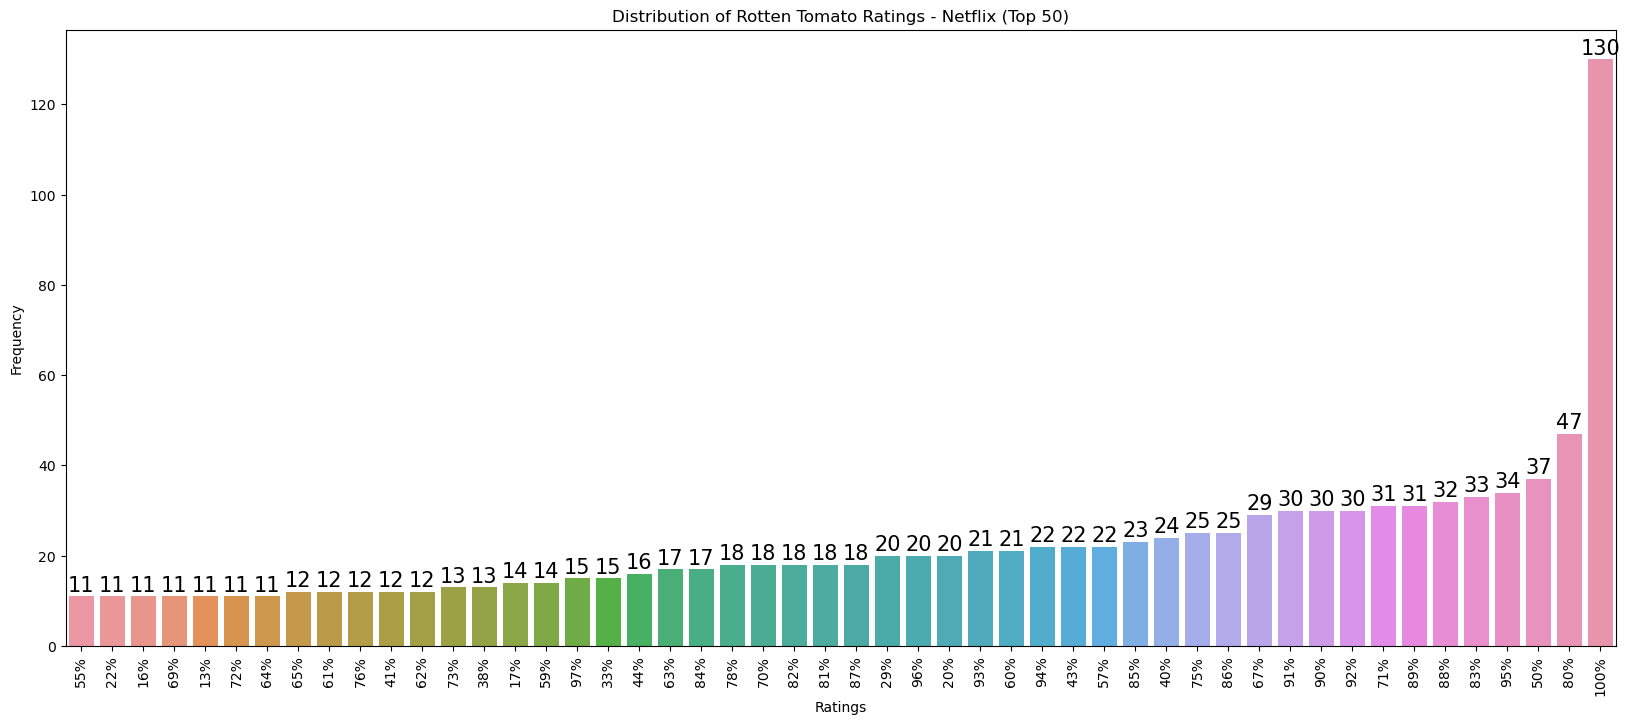

In [55]:
plt.figure(figsize= (20, 8))
plots = sns.barplot(x = tomato_ratings_netflix.tail(50).index, y = tomato_ratings_netflix.tail(50).values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Distribution of Rotten Tomato Ratings - Netflix (Top 50)')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show(plots)

### Amazon Prime

In [56]:
tomato_ratings_amazon = df.loc[df['Prime Video'] == 1, 'Rotten Tomatoes'].value_counts().sort_values()
tomato_ratings_amazon

2%        2
3%        3
51%       4
6%        5
28%       5
       ... 
50%      81
67%      81
83%      85
80%     101
100%    257
Name: Rotten Tomatoes, Length: 99, dtype: int64

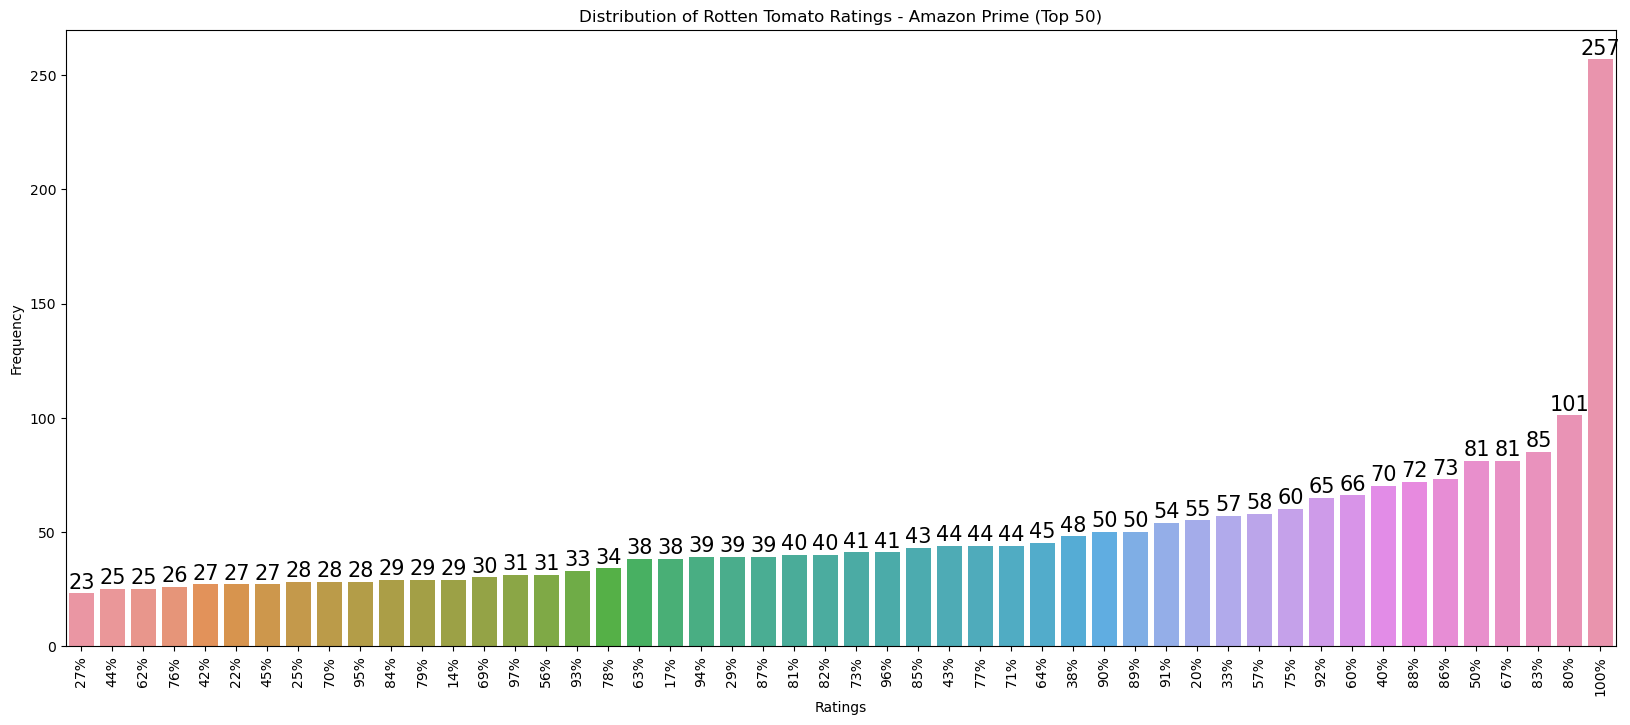

In [58]:
plt.figure(figsize= (20,8))
plots = sns.barplot(x = tomato_ratings_amazon.tail(50).index, y = tomato_ratings_amazon.tail(50).values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Distribution of Rotten Tomato Ratings - Amazon Prime (Top 50)')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show(plots)

### Disney+

In [59]:
tomato_ratings_disney = df.loc[df['Disney+'] == 1, 'Rotten Tomatoes'].value_counts().sort_values()
tomato_ratings_disney

6%       1
5%       1
9%       1
11%      1
58%      1
        ..
67%      9
88%     10
50%     10
40%     13
100%    19
Name: Rotten Tomatoes, Length: 88, dtype: int64

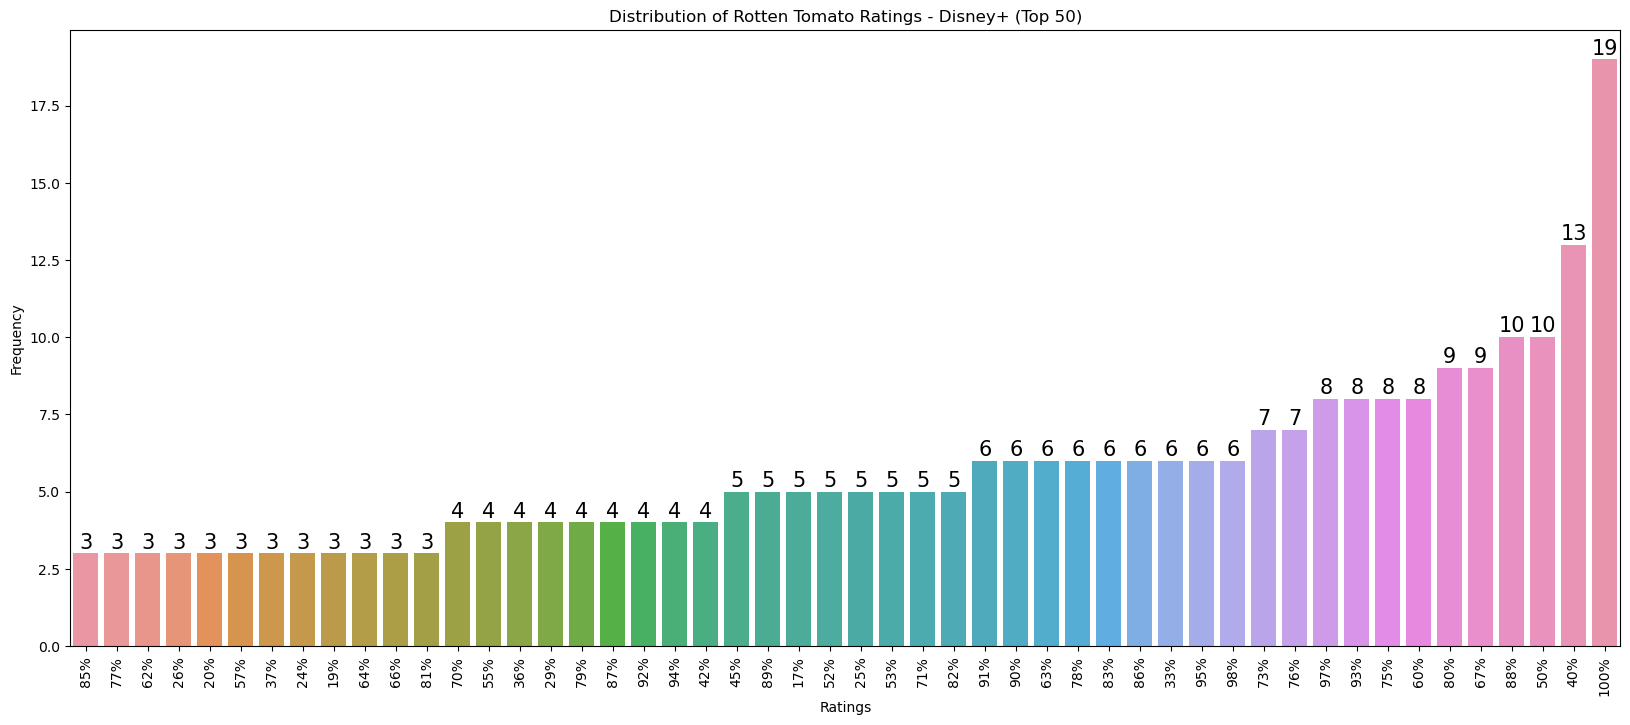

In [60]:
plt.figure(figsize= (20,8))
plots = sns.barplot(x = tomato_ratings_disney.tail(50).index, y = tomato_ratings_disney.tail(50).values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Distribution of Rotten Tomato Ratings - Disney+ (Top 50)')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show(plots)

### Hulu

In [61]:
tomato_ratings_hulu = df.loc[df['Hulu'] == 1, 'Rotten Tomatoes'].value_counts().sort_values()
tomato_ratings_hulu

4%       1
16%      1
53%      1
7%       1
26%      1
        ..
88%     16
86%     16
91%     17
89%     17
100%    18
Name: Rotten Tomatoes, Length: 97, dtype: int64

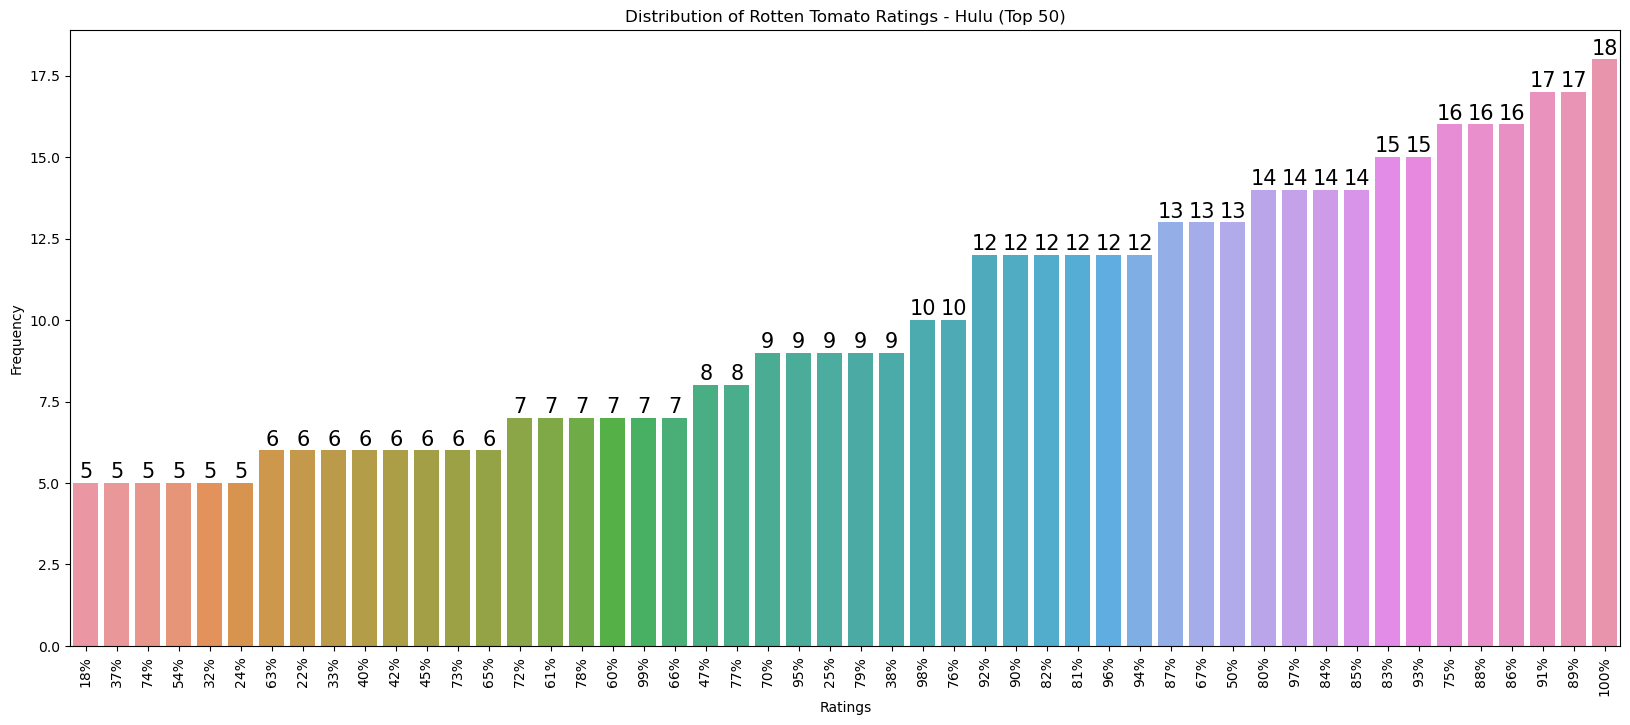

In [62]:
plt.figure(figsize= (20,8))
plots = sns.barplot(x = tomato_ratings_hulu.tail(50).index, y = tomato_ratings_hulu.tail(50).values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Distribution of Rotten Tomato Ratings - Hulu (Top 50)')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show(plots)

### Maximum Rotten Tomatoes Score per Streaming Service

In [63]:
df.loc[df.Netflix == 1, 'Rotten Tomatoes'].value_counts()[0]

130

In [64]:
df.loc[df['Hulu'] == 1, 'Rotten Tomatoes'].value_counts()[0]

18

In [65]:
df.loc[df['Disney+'] == 1, 'Rotten Tomatoes'].value_counts()[0]

19

In [66]:
df.loc[df['Prime Video'] == 1, 'Rotten Tomatoes'].value_counts()[0]

257

In [67]:
max_rt_scores = pd.DataFrame({'Streaming Services': ['Netflix', 'Hulu', 'Disney+', 'Prime Video'],
             'Rotten Tomato Scores': [df.loc[df.Netflix == 1, 'Rotten Tomatoes'].value_counts()[0],
                                      df.loc[df['Hulu'] == 1, 'Rotten Tomatoes'].value_counts()[0],
                                      df.loc[df['Disney+'] == 1, 'Rotten Tomatoes'].value_counts()[0],
                                      df.loc[df['Prime Video'] == 1, 'Rotten Tomatoes'].value_counts()[0]
                                     ]
            })

max_rt_scores

Streaming Services  Rotten Tomato Scores
0            Netflix                   130
1               Hulu                    18
2            Disney+                    19
3        Prime Video                   257

In [68]:
max_rt_scores_sorted = max_rt_scores.sort_values(ascending = False, by = 'Rotten Tomato Scores')
max_rt_scores_sorted

Streaming Services  Rotten Tomato Scores
3        Prime Video                   257
0            Netflix                   130
2            Disney+                    19
1               Hulu                    18

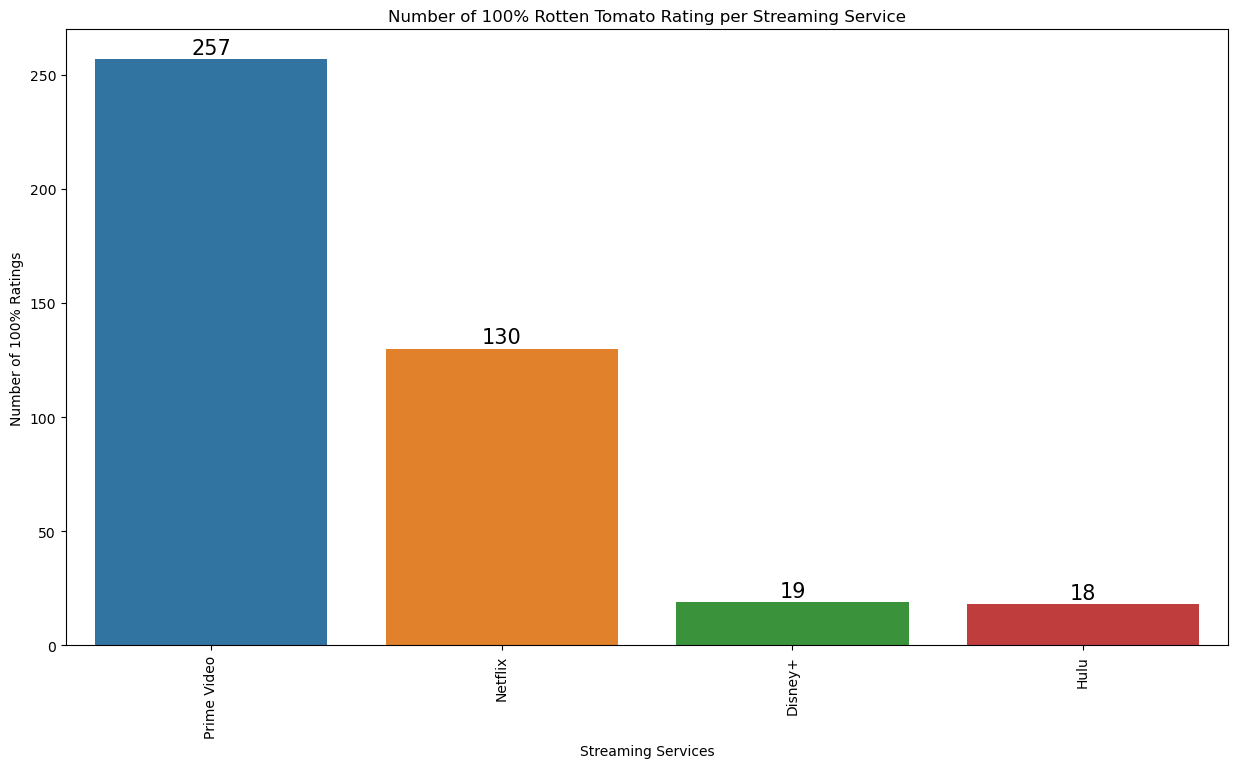

In [69]:
plt.figure(figsize= (15,8))
plots = sns.barplot(x = max_rt_scores_sorted['Streaming Services'], y = max_rt_scores_sorted['Rotten Tomato Scores'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Number of 100% Rotten Tomato Rating per Streaming Service')
plt.xlabel('Streaming Services')
plt.ylabel('Number of 100% Ratings')
plt.xticks(rotation = 90)
plt.show(plots)